In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as st 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.compose import make_column_selector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# import category_encoders as ce
import datetime

# EDA

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20249,345066,2 bed condo for sale in lentor modern,lentor central,lentor modern,condo,99-year leasehold,2026.0,2.0,2.0,635,...,unspecified,"1, 2, 3, 4 br",605.0,https://www.99.co/singapore/condos-apartments/...,1.385938,103.834466,0,tagore,ang mo kio,1050000.0
20250,868680,2 bed condo for sale in mori,223 guillemard road,mori,Condo,freehold,2026.0,2.0,2.0,883,...,unspecified,"1, 2, 3, 4 br",137.0,https://www.99.co/singapore/condos-apartments/...,1.315948,103.857589,0,lavender,kallang,2087400.0
20251,928187,4 bed condo for sale in pullman residences newton,18 dunearn road,pullman residences newton,condo,freehold,2023.0,4.0,4.0,1378,...,unspecified,"studio, 1, 2, 3, 4, 5 br",340.0,https://www.99.co/singapore/condos-apartments/...,1.315961,103.836848,0,moulmein,novena,4193700.0
20252,135122,hdb flat for sale in 691d woodlands drive 73,admiralty / woodlands (d25),admiralty flora,hdb 5 rooms,99-year leasehold,2017.0,3.0,2.0,1205,...,unfurnished,"2, 3, 4 br",402.0,https://www.99.co/singapore/hdb/admiralty-flor...,1.440753,103.806671,0,woodlands east,woodlands,754800.0


In [4]:
train.describe()

,listing_id,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,elevation,price
count,20254.000000,19332.000000,20174.000000,19820.000000,2.025400e+04,14602.000000,20254.000000,20254.000000,20254.0,2.025400e+04
mean,550763.206428,2010.833695,3.122931,2.643542,1.854364e+03,376.253938,1.434282,103.855356,0.0,5.228263e+06
std,258874.420108,15.822803,1.281658,1.473835,1.354343e+04,346.882474,1.558472,3.593441,0.0,2.779748e+08
min,100043.000000,1963.000000,1.000000,1.000000,0.000000e+00,4.000000,1.239621,-77.065364,0.0,0.000000e+00
25%,326279.000000,2000.000000,2.000000,2.000000,8.070000e+02,106.000000,1.307329,103.806576,0.0,8.190000e+05
50%,551397.000000,2017.000000,3.000000,2.000000,1.119000e+03,296.000000,1.329266,103.841552,0.0,1.680000e+06
75%,774044.500000,2023.000000,4.000000,3.000000,1.528000e+03,561.000000,1.372461,103.881514,0.0,3.242400e+06
max,999944.000000,2028.000000,10.000000,10.000000,1.496000e+06,2612.000000,69.486768,121.023232,0.0,3.924243e+10


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20254 entries, 0 to 20253
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            20254 non-null  int64  
 1   title                 20254 non-null  object 
 2   address               20254 non-null  object 
 3   property_name         20254 non-null  object 
 4   property_type         20254 non-null  object 
 5   tenure                18531 non-null  object 
 6   built_year            19332 non-null  float64
 7   num_beds              20174 non-null  float64
 8   num_baths             19820 non-null  float64
 9   size_sqft             20254 non-null  int64  
 10  floor_level           3508 non-null   object 
 11  furnishing            20254 non-null  object 
 12  available_unit_types  18813 non-null  object 
 13  total_num_units       14602 non-null  float64
 14  property_details_url  20254 non-null  object 
 15  lat                

## Missing value analysis

<AxesSubplot:>

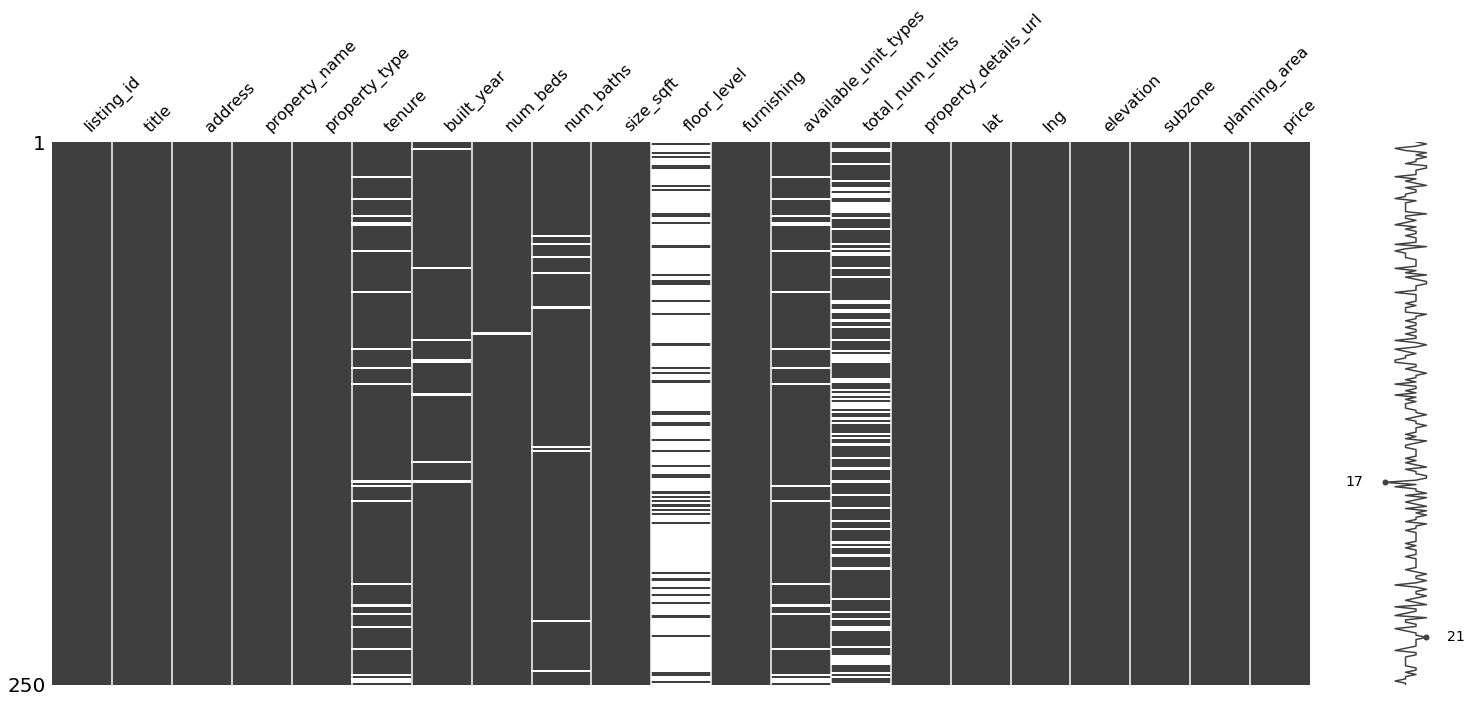

In [6]:
import missingno as msno
%matplotlib inline
msno.matrix(train.sample(250))

<AxesSubplot:>

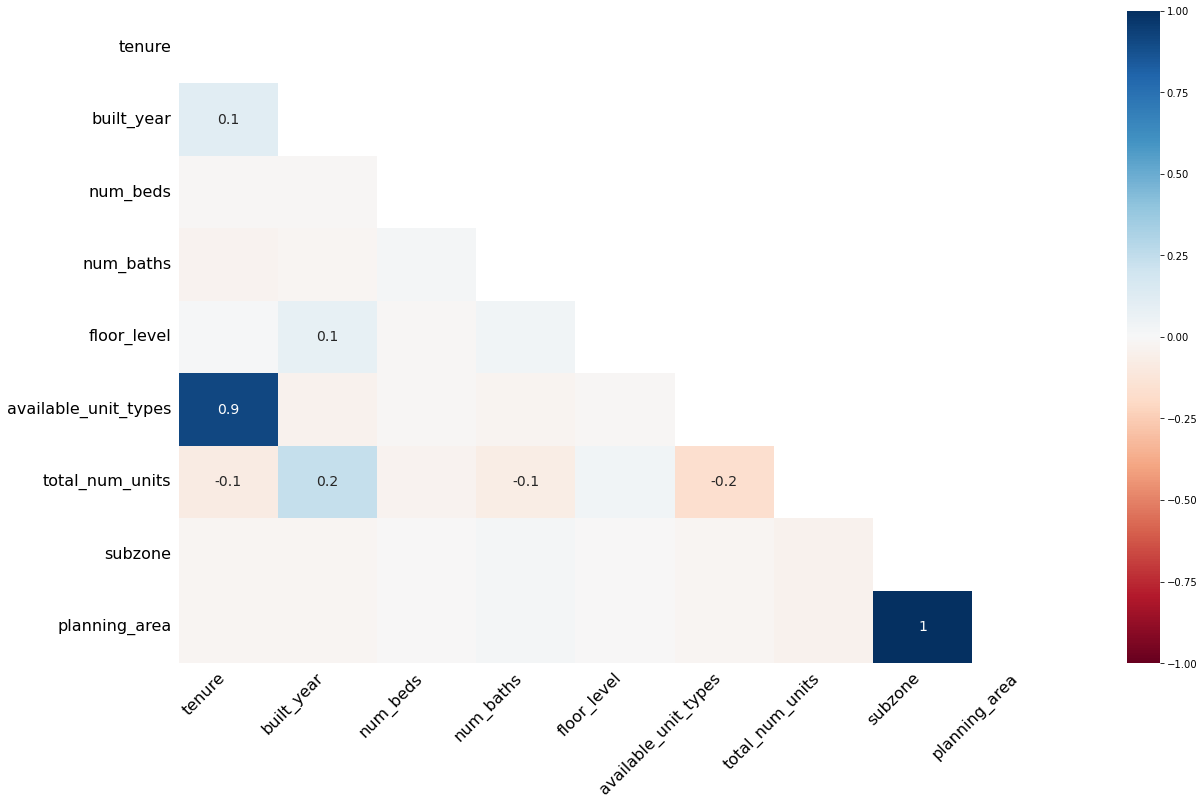

In [7]:
msno.heatmap(train)

The absence of data happens in 9 columns. Among these columns, floor_level seems less important as only few rows record floor_level information. This column may be removed. Total_num_units also has large amount of absence, which should be trade seriously. The absence of rest columns is relatively easy to handle. Besides, the absence of available_unit_types is strongly correlated with the absence of tenure, the reason need to be explored.

## Distribution analysis

In [28]:
train = train[train['price'] != 0]
train['log_price'] = np.log(train['price'])

C:\Users\blood\AppData\Local\Temp\ipykernel_31216\1082906000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['log_price'] = np.log(train['price'])


Skewness: 0.622527
Kurtosis: 0.785362


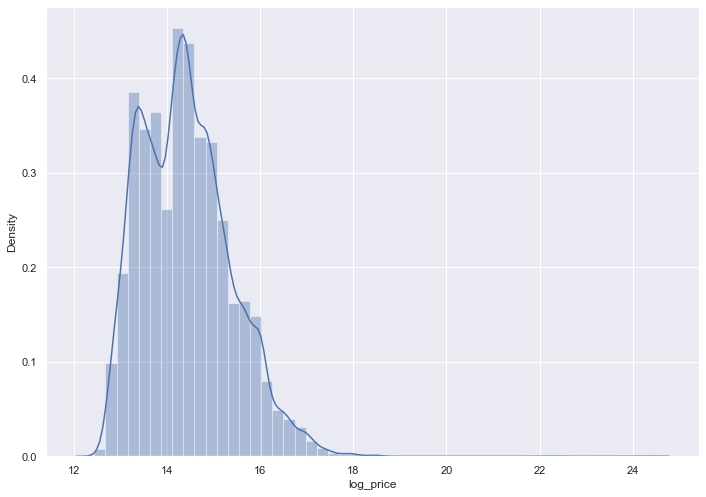

In [29]:
sns.distplot(train['log_price']);
print("Skewness: %f" % train['log_price'].skew())
print("Kurtosis: %f" % train['log_price'].kurt())

Result shows that price only a few property is very high, and price of most property is relatively low.

## property_type analysis

In [30]:
train['property_type'].unique()

array(['hdb 4 rooms', 'hdb', 'condo', 'Condo', 'bungalow', 'Hdb',
       'terraced house', 'Hdb Executive', 'apartment',
       'Semi-Detached House', 'Apartment', 'Hdb 4 Rooms',
       'semi-detached house', 'hdb 3 rooms', 'executive condo',
       'corner terrace', 'hdb executive', 'Hdb 3 Rooms', 'Hdb 5 Rooms',
       'hdb 5 rooms', 'landed', 'hdb 2 rooms', 'Executive Condo',
       'Bungalow', 'Corner Terrace', 'Terraced House', 'cluster house',
       'Cluster House', 'Land Only', 'townhouse', 'Hdb 2 Rooms',
       'conservation house', 'land only', 'walk-up', 'Townhouse',
       'Conservation House', 'good class bungalow', 'Landed', 'shophouse'],
      dtype=object)

In [35]:
train['property_type'].value_counts()

condo                  7815
hdb                    2288
Condo                  1733
hdb 3 rooms             961
hdb 4 rooms             947
semi-detached house     851
executive condo         819
bungalow                620
hdb 5 rooms             565
Hdb                     509
apartment               439
terraced house          363
hdb executive           243
Hdb 3 Rooms             232
corner terrace          209
Executive Condo         190
hdb 2 rooms             187
Hdb 4 Rooms             177
Semi-Detached House     167
cluster house           153
Bungalow                127
Hdb 5 Rooms             114
Apartment               101
Terraced House           83
Hdb Executive            62
Hdb 2 Rooms              47
Corner Terrace           46
Cluster House            31
landed                   17
walk-up                  16
conservation house       15
townhouse                 6
Conservation House        6
good class bungalow       5
Townhouse                 3
Landed              

The case of label should be consistent

In [42]:
df = train.copy()
#Change all to uppercase
df['property_type']=df['property_type'].str.upper()

#Change all to uppercase
df['property_type']=df['property_type'].str.upper()

<AxesSubplot:xlabel='count', ylabel='property_type'>

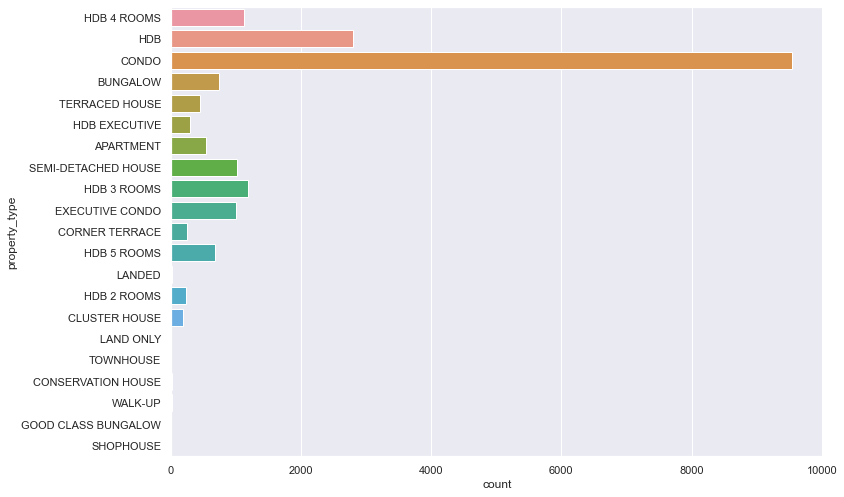

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='property_type',data=df)

<AxesSubplot:xlabel='log_price', ylabel='property_type'>

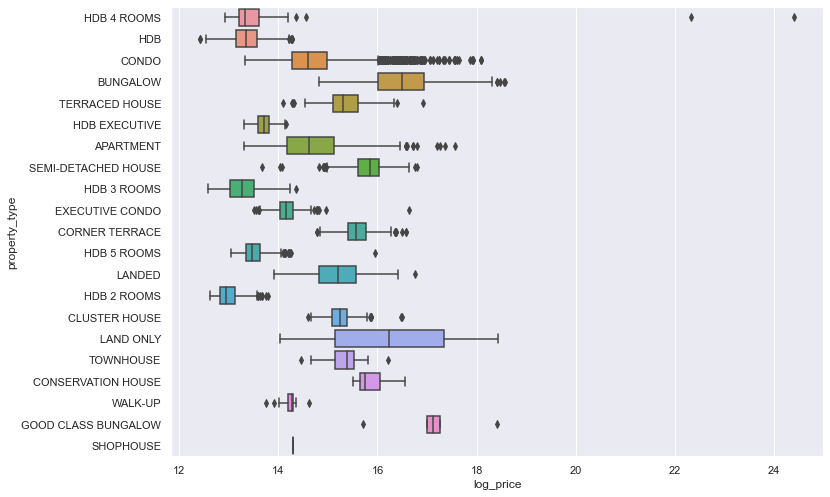

In [44]:
sns.boxplot(y='property_type',x='log_price',data=df)

<AxesSubplot:xlabel='log_price', ylabel='property_type'>

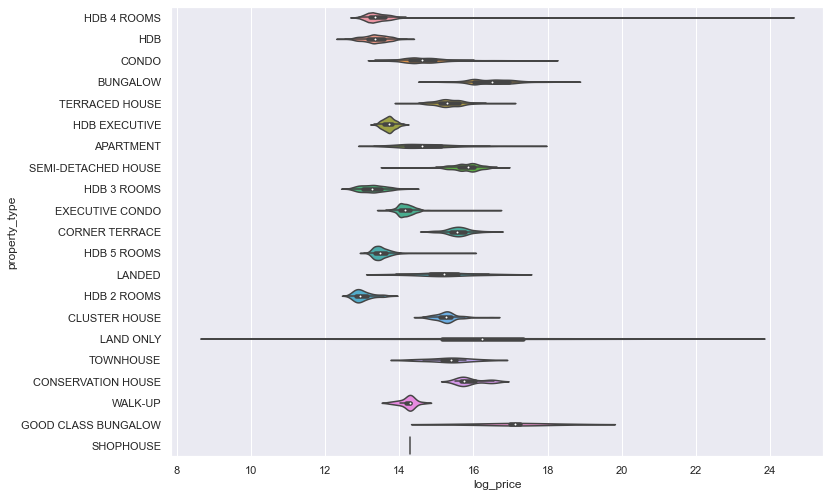

In [45]:
sns.violinplot(y='property_type',x='log_price',data=df)

In [59]:
df['property_type'] = df['property_type'].replace(
    ['CLUSTER HOUSE', 'CONSERVATION HOUSE', 'LANDED', 'WALK-UP', 'TOWNHOUSE', 'GOOD CLASS BUNGALOW', 'CORNER TERRACE', 'SEMI-DETACHED HOUSE', 'BUNGALOW', 'TERRACED HOUSE','LAND ONLY', 'SHOPHOUSE'],
    'LANDED'
)

In [60]:
landedNames = df[(df['property_type']=='LANDED')].index
public = df.drop(landedNames)

In [61]:
public

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,log_price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,HDB 4 ROOMS,NaN,1988.0,3.0,2.0,1115,...,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0,13.150951
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,HDB,99-year leasehold,1992.0,4.0,2.0,1575,...,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0,13.810900
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,CONDO,freehold,2022.0,4.0,6.0,3070,...,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0,15.953810
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,CONDO,freehold,2023.0,3.0,2.0,958,...,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0,14.780972
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,CONDO,99-year leasehold,2026.0,2.0,1.0,732,...,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0,14.383095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20249,345066,2 bed condo for sale in lentor modern,lentor central,lentor modern,CONDO,99-year leasehold,2026.0,2.0,2.0,635,...,"1, 2, 3, 4 br",605.0,https://www.99.co/singapore/condos-apartments/...,1.385938,103.834466,0,tagore,ang mo kio,1050000.0,13.864301
20250,868680,2 bed condo for sale in mori,223 guillemard road,mori,CONDO,freehold,2026.0,2.0,2.0,883,...,"1, 2, 3, 4 br",137.0,https://www.99.co/singapore/condos-apartments/...,1.315948,103.857589,0,lavender,kallang,2087400.0,14.551430
20251,928187,4 bed condo for sale in pullman residences newton,18 dunearn road,pullman residences newton,CONDO,freehold,2023.0,4.0,4.0,1378,...,"studio, 1, 2, 3, 4, 5 br",340.0,https://www.99.co/singapore/condos-apartments/...,1.315961,103.836848,0,moulmein,novena,4193700.0,15.249094
20252,135122,hdb flat for sale in 691d woodlands drive 73,admiralty / woodlands (d25),admiralty flora,HDB 5 ROOMS,99-year leasehold,2017.0,3.0,2.0,1205,...,"2, 3, 4 br",402.0,https://www.99.co/singapore/hdb/admiralty-flor...,1.440753,103.806671,0,woodlands east,woodlands,754800.0,13.534208


<AxesSubplot:xlabel='log_price', ylabel='property_type'>

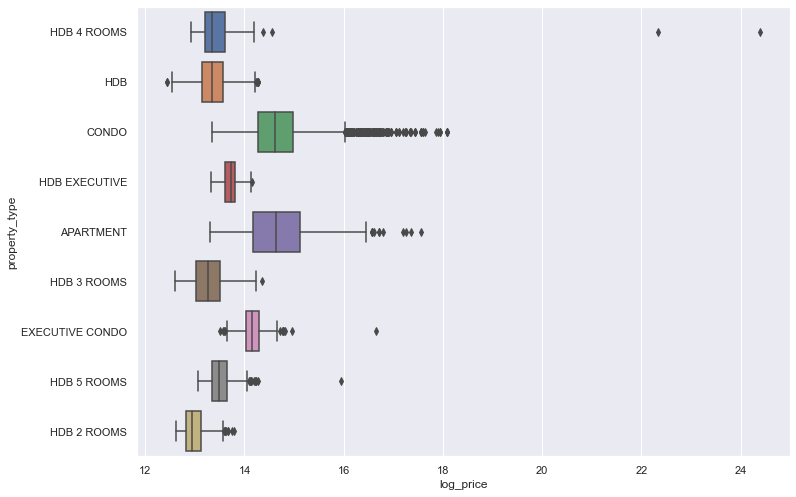

In [62]:
sns.boxplot(y='property_type',x='log_price',data=public)

D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.622527
Kurtosis: 0.785362


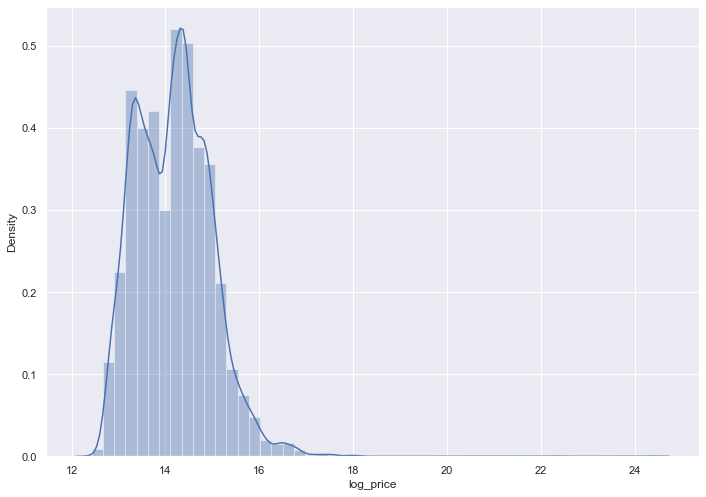

In [63]:
sns.distplot(public['log_price']);
print("Skewness: %f" % train['log_price'].skew())
print("Kurtosis: %f" % train['log_price'].kurt())

In [64]:
private = df[(df['property_type']=='LANDED')]

In [65]:
private

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,log_price
7,483990,5 bed house for sale in hong kong park,hua guan avenue,hong kong park,LANDED,999-year leasehold,NaN,5.0,6.0,11500,...,"2, 3, 4, 5, 6, 7 br",NaN,https://www.99.co/singapore/houses/hong-kong-p...,1.342340,103.784489,0,swiss club,bukit timah,15645000.0,16.565662
21,783538,5 bed house for sale in loyang villas,loyang rise,loyang villas,LANDED,99-year leasehold,1996.0,5.0,5.0,2700,...,"studio, 4, 5, 6, 7 br",423.0,https://www.99.co/singapore/houses/loyang-vill...,1.364268,103.967589,0,flora drive,pasir ris,2079000.0,14.547398
23,755828,5 bed house for sale in montrose terrace,mount rosie road,montrose terrace,LANDED,NaN,NaN,5.0,6.0,7829,...,5 br,NaN,https://www.99.co/singapore/houses/montrose-te...,1.322016,103.836450,0,malcolm,novena,11025000.0,16.215676
26,211875,4 bed house for sale in the carrara,mountbatten road,the carrara,LANDED,freehold,2025.0,4.0,5.0,4716,...,"studio, 4, 5, 6, 7 br",6.0,https://www.99.co/singapore/houses/the-carrara...,1.300620,103.892783,0,mountbatten,marine parade,8059800.0,15.902399
32,241839,4 bed house for sale in opera estate,norma terrace,opera estate,LANDED,freehold,1980.0,4.0,4.0,1392,...,"studio, 2, 3, 4, 5, 6, 7, 8, 9 br",NaN,https://www.99.co/singapore/condos-apartments/...,1.319664,103.923766,0,frankel,bedok,4830000.0,15.390357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,134346,4 bed house for sale in alana,sunrise terrace,alana,LANDED,103-year leasehold,NaN,4.0,4.0,3057,...,"3, 4 br",78.0,https://www.99.co/singapore/houses/alana-deq2w...,1.387490,103.857082,0,yio chu kang east,ang mo kio,3205600.0,14.980410
20213,572133,4 bed house for sale in villa verde,verde crescent,villa verde,LANDED,99-year leasehold,2000.0,4.0,4.0,3000,...,"4, 5, 6, 7 br",515.0,https://www.99.co/singapore/houses/villa-verde...,1.392202,103.750324,0,choa chu kang north,choa chu kang,2467500.0,14.718716
20221,243201,5 bed house for sale in pasir ris beach park,pasir ris way,pasir ris beach park,LANDED,NaN,1977.0,5.0,4.0,5990,...,"3, 4, 5, 6, 7, 9 br",NaN,https://www.99.co/singapore/houses/pasir-ris-b...,1.386285,103.937608,0,pasir ris wafer fab park,pasir ris,6489000.0,15.685619
20241,721331,6 bed house for sale in the carrara,mountbatten road,the carrara,LANDED,freehold,2025.0,6.0,6.0,4717,...,"studio, 4, 5, 6, 7 br",6.0,https://www.99.co/singapore/houses/the-carrara...,1.300620,103.892783,0,mountbatten,marine parade,8059800.0,15.902399


Skewness: 0.622527
Kurtosis: 0.785362


D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


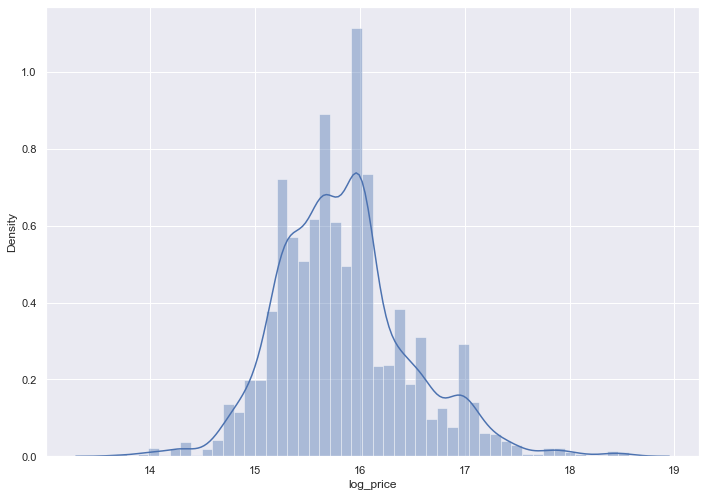

In [66]:
sns.distplot(private['log_price']);
print("Skewness: %f" % train['log_price'].skew())
print("Kurtosis: %f" % train['log_price'].kurt())

Most trade property type is HDB and Condo, the landed property only occupy a small proportion. Almost none of the landed property have more than 100 trades.The relation of these categories of landed property may also cause confusion. Besides, both of data of public property and private property approach nornal distribution, but the two kinds of property together may skew the data. So we decided to remove landed property.

In [67]:
def three_sigma(ser):
    mean_data=ser.mean()
    std_data=ser.std()
    rule=(mean_data-3*std_data > ser) | (mean_data+3*std_data < ser)
    index=np.arange(ser.shape[0])[rule]
    outliers=ser.iloc[index]
    return outliers

three_sigma(public['log_price'])

18       16.798158
340      16.591500
663      17.245635
760      18.083808
872      16.899254
           ...    
18828    17.444343
18924    16.792824
19159    17.444343
19587    16.641877
20027    17.601970
Name: log_price, Length: 115, dtype: float64

There are still several outliers in public property data. As the distribution is close to normal distribution, it is possible to use 3-sigma method combine with boxplot to find these outliers out.